In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


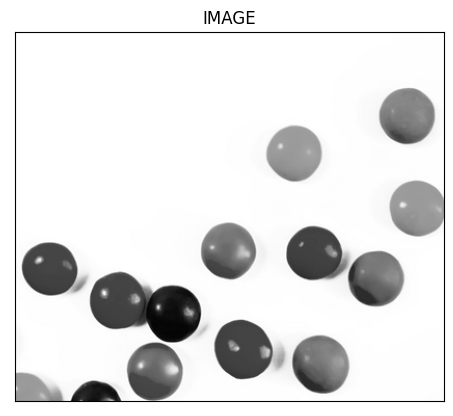

In [2]:
## this will be interesting
## We will be looking into morphological transformations, like errosion, dillation etc
## morphological transformations are simple operations performed on images shapes and on binary images
## lets read an image
img = cv.imread("./smarties.png", 0)
## lets use matplotlib to show the images

titles = ["IMAGE"]
images = [img]

for i in range(1):
    plt.subplot(1,1,i+1),
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

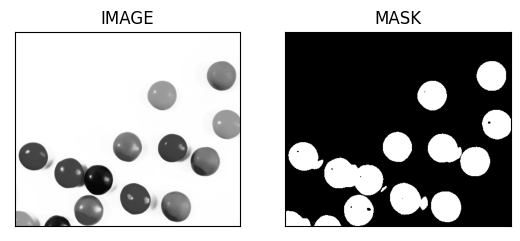

In [3]:
## as we perform transforamtions on binary images, lets use the thresholding method here
## resuing the code above
img = cv.imread("./smarties.png", 0)
_, mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY_INV) 
# img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
## lets use matplotlib to show the images and mask

titles = ["IMAGE", "MASK"]
images = [img, mask]

for i in range(2):
    plt.subplot(1,2,i+1),
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

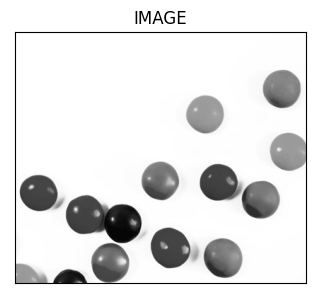

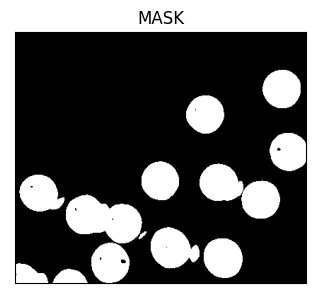

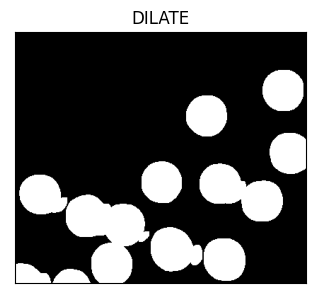

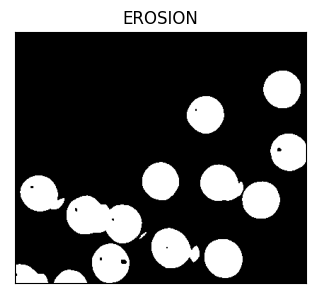

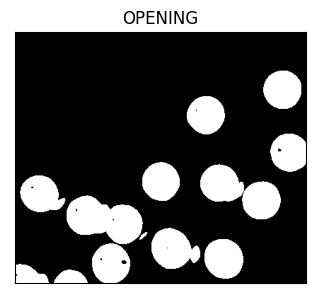

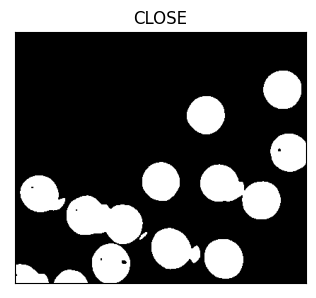

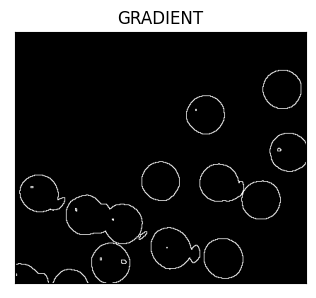

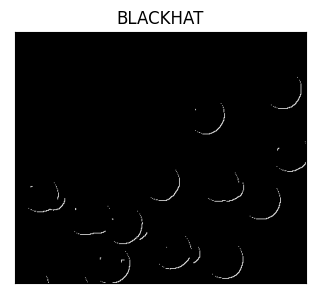

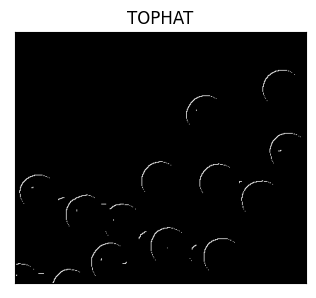

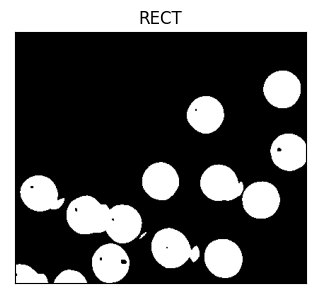

In [5]:
## here we can see the black dots on the balls. We can remove them via using dillation
## reusing the above code
img = cv.imread("./smarties.png", 0)
_, mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY_INV) 

## lets apply the cv.dilate method. We will be providing two arguments, source -> mask and kerneland iterations
## the basic idea of dillation is to remove the black artifacts. Here, when the kernel will slide, the pixel values 
## will be converted into one if atleast one of them is 1. Otheriwse it will only be 0 if all of them are 0. Thus also helpful
## to increase the size of boundries
kernel = np.ones((2,2))
dillation = cv.dilate(mask, kernel,iterations=4)

## we also apply cv.erode. THe basic idea of erosion is to erode the boundries of the object.
## a kernel will slide on the image, the pixel values under the kernel will be converted to 1 if all of them will be one
## otherwise, it will be transfromed into 0. Thus eroding the boundries
erosion = cv.erode(mask, kernel, iterations=1)

## lets apply opening method via cv.morphologyEx() -> it is erosion followed by dilation
## this is particulary usefull to remove the white noise. Erod will remove the white noise and also
## decrease the size of object. This will be recovered by the dillation afterward
opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

## lets apply closing - which is opposite of opening -> dillation followed by erosion
## this is particulary useful in removing the black objects inside the object. This will also increase the boundary size of 
## the object, which will be overcome by using erosion
close = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

## other morphologicalEx includes: Morphological_gradient. This is the difference of dillation and erosion
## after applying each pixel value will indicates the contrast intensity in the nearby pixels. This is useful to 
## display the outline. This is used in edge detection, segmentation and to find the outline of an object
gradient = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel)

## blackhat - It is the difference between input image and Opening of the image - 
## computes the dark spots smaller than the structuring element.
blackht = cv.morphologyEx(mask, cv.MORPH_BLACKHAT, kernel)

## tophat - difference between input image and its opening by some structure element.
## computes the bright spots smaller than the structuring element.
topht = cv.morphologyEx(mask, cv.MORPH_TOPHAT, kernel)

##other is RECT:
rect = cv.morphologyEx(mask, cv.MORPH_RECT, kernel)

## lets use matplotlib to show the images and mask

titles = ["IMAGE", "MASK", "DILATE", "EROSION", "OPENING", "CLOSE", "GRADIENT", "BLACKHAT", "TOPHAT", "RECT"]
images = [img, mask, dillation, erosion, opening, close, gradient, blackht, topht, rect]

for i in range(10):
    plt.figure(figsize=(15,15))
#     plt.subplot(4,3,i+1) 
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()